<h3> Application of break, loop and function statement </h3>
The Newton method for finding the solution of algegraic and trancendal equation is given as:

$$x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$
Lets take the following algebraic equation

$$f(x) = x^3 + 3x^2 + 4x + 3$$
$$f'(x) = 3x^2 + 6x + 4$$

In [5]:
#define the algebraic function and its derivative function
def f(x):
    return x**3 + 3*x**2 + 4*x + 3
def f_dot(x): #derivative of f(x)
    return 3*x**2 + 6*x + 4

In [6]:
max_iter = 100 #maximumu iteration to complete
x0 = 0.001 #initial guess of solution
solution = []
for i in range(100):
    x1 = x0 - f(x0)/f_dot(x0)
    print(x1)
    #condition check
    if abs(x1-x0)< 0.000001:  #check whether consecutive solution of x is repetative or not
        print("solu",x0)
        break
    x0 = x1             #to iterate

    

-0.7488753747812971
-1.8142733872096057
-1.6957870965631978
-1.6824810002605237
-1.6823278238702855
-1.6823278038280192
solu -1.6823278238702855


In [7]:
#check the solution
f(x0) #the result should satisfy the algebraic equation to be solution

-4.80355755172468e-08

In [8]:
#lets build a function for Newton method
def newtons_method(x0,f,f_dot ,tolerance,max_iterations):
    for i in range(max_iterations):
        y = f(x0)
        ydot = f_dot(x0)

        x1 = x0 - y / ydot           # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None

In [9]:
#lets use the netwon function to obtain the results
max_iter = 100
max_tol = 0.00001
x0 = 1
#call the function
solution = newtons_method(x0,f,f_dot,max_tol,max_iter)
solution

-1.6823278038280196

<h3> Method of False Position </h3>

$$x_2 = x_1 - \frac{(x_1-x_0)f(x_0)}{f(x_1) - f(x_0)}$$

In [10]:
max_iter = 100 #maximumu iteration to complete
x0,x1 = 0,1 #initial guess of solution
solution = []
for i in range(100):
    x2 = x0 - ((x1 - x0)*f(x0))/(f(x1) - f(x0))
    print(x2)
    #condition check
    if abs(x1-x0)< 0.000001:  #check whether consecutive solution of x is repetative or not
        print("solu",x0)
        break
    x0 = x1             #to iterate
    x1 = x2

-0.375
-0.6564705882352941
-1.4596014155111812
-1.8380637553400387
-1.6524512399639035
-1.6785481662909385
-1.682425427591089
-1.6823274882641066
-1.6823278038017089
-1.6823278038280192
solu -1.6823274882641066


In [11]:
#we can use the scipy library to obtain the roots of algebraic equation
from scipy.optimize import fsolve #import the function from scipy.optimize library

fsolve(f,x0)

array([-1.6823278])

<h3>Intro. to numpy array</h3>

In [12]:
import numpy as np

a = np.array([[1,2,3,4],
             [3,4,5,6]])
x = np.zeros((2,3))
y = np.empty((4,4))
b = np.array([1,3,4,5,7])

In [17]:
x = np.ones((3,4))
y = np.ones((4,3))
x

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [19]:
x.dot(y)

array([[4., 4., 4.],
       [4., 4., 4.],
       [4., 4., 4.]])

In [20]:
#finding roots with numpy
np.roots([1,3,4,3])

array([-1.6823278+0.j       , -0.6588361+1.1615414j,
       -0.6588361-1.1615414j])

<h3> Intro to graphics library </h3>


In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
y = np.array([1,9,3,4,5,6,7])
x = np.array([0,1,2,3,4,5,6])

Text(0, 0.5, 'discharge $m^3/s$')

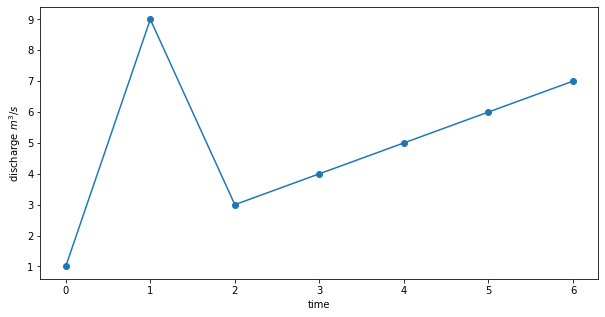

In [23]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(x,y)
ax.scatter(x,y)
ax.set_xlabel('time')
ax.set_ylabel('discharge $m^3/s$')

<h3> Interpolation </h2>

We need to find the estimation function $\hat{y}(x)$ such that $\hat{y}(x_i) = y_i$, where $x_i$ and $y_i$ are the given data points. We discuss about two of interpolation techniques viz.:

<h4> Linear Interpolation</h4>

The estimated point is assumed to lie on the line joining the nearst points to the left and right. let the data points be $(x_i, x_{i+1})$ and $(y_i, y_{i+1})$. For the point x such that $x_i \leq x \leq x_{i+1}$, we have the interpolation function as:

$$\hat{y}(x) = y_i + \frac{(y_{i+1} - y_i)(x-x_i)}{(x_{i+1} - x_i)}$$

<h4> Spline Interpolation </h4>

The estimated point is assumed to lie on the line joining the points $(x_i, x_{i+1})$ and $(y_i, y_{i+1})$ defined by the cubic polynomial$$ S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i$$.

Before applying the fuction we have to find the coefficents, the cofficents are determined using the following conditions:

$$S_i(x_i) = y_i$$
$$S_i(x_{i+1}) = S_i(x_{i+1}) $$
$$S_i'(x_i) = y_i'$$
$$S_i'(x_{i+1}) = S_i'(x_{i+1}) $$

The obtained linear equation are solved to find the coefficent to obtain the interpolation function.


In [25]:
#for linear and spline interpolation we use, scipy interplate class
from scipy.interpolate import interp1d,CubicSpline

In [26]:
x = [0, 1, 2,4,5,6,7,8]
y = [1, 3, 2,8,9,6,8,4]

In [30]:
inter_f = interp1d(x,y)
inter_fc = CubicSpline(x,y)

In [34]:
inter_f(2.5)
inter_fc(2.5)

2.7162828947368416